In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Exploring the dataset

In [ ]:
# Check the shape of the dataset
data.shape

(119390, 32)

In [ ]:
# Check the data types and non-null counts of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


# Check for missing values

In [ ]:
missing_data= data.isna().sum()
missing_percent = round((missing_data/len(data)*100),2)

# converting missing vals into Dataframe
missing_df=pd.DataFrame(
    {
        'missing_number':missing_data,
        'missing_percent':missing_percent
    }
)
# filter out cols with missing vals
missing_df=missing_df[missing_df['missing_number']>0]

# sort by highest percent
missing_df.sort_values(by=['missing_percent','missing_number'],ascending=False)

,missing_number,missing_percent
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


Categorical cols like **'Agent' & 'Company'** has Null values but they cannot be considered as missing but rather as 'not applicable'.

*Eg : if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.*

# Duplicate the data

In [ ]:
df=data.copy()
df.shape

(119390, 32)

# Check Numerical & Categorical data

In [ ]:
# numerical data
num_cols= df.select_dtypes(include="number").columns
num_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
cat_cols=df.select_dtypes(exclude='number').columns
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

# Handle Missing Values

## company is numerical column so filling it with 0 if 0 does not exists

In [ ]:
# check if 0 exists in unique values of company colum
if 0 in df['company'].unique():
  print('0 exists')
else:
  print('0 does not exists')

0 does not exists


In [ ]:
df['company']=df['company'].fillna(0)
# display unique values in company column
df['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
df.shape

(119390, 32)

## agent is again numerical column

In [ ]:
# checking unique values in agent column
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
# check if 0 exists in unique values of agent colum
if 0 in df['agent'].unique():
  print('0 exists')
else:
  print('0 does not exists')

0 does not exists


In [ ]:
df['agent'] = df['agent'].fillna(0)

df['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

## Country

In [ ]:
df['country']=df['country'].replace(np.nan,'UNK') # unknown
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UNK', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

## CN & CHN represent China so combine them

In [ ]:
df['country']=df['country'].replace('CN','CHN')

## children

In [ ]:
# checking rows where children column has missing values
df.loc[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,12.0,0,1,Canceled,01-08-15
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0.0,0,Transient-Party,12.0,0,1,Canceled,04-08-15
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,18.0,0,2,Canceled,04-08-15
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0.0,0,Transient-Party,76.5,0,1,Canceled,09-08-15


In [ ]:
# filling 4 missing values in children column with 0
df['children']=df['children'].fillna(0).astype(int)

df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [ ]:
df.shape

(119390, 32)

# verifying all missing values handled or not

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# mapping col: unique values
for col in df.columns:
    print(f'{col} :\n{df[col].unique()}\n')

hotel :
['Resort Hotel' 'City Hotel']

is_canceled :
[0 1]

lead_time :
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

# TW: dont open the above output its quite huge

## Mapping values in the meal column

In [ ]:
meal_mapping = {
    'Undefined': 'SC',  # Replace 'Undefined' with 'SC'
    'SC': 'SC',         # Self-catering
    'BB': 'BB',         # Bed & Breakfast
    'HB': 'HB',         # Half board
    'FB': 'FB'          # Full board
}

df['meal'] = df['meal'].map(meal_mapping)

## Sort months in the chronological order

arrival_date_month: The month of the customer's hotel arrival.

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# python sorts alphabetically, py tells pandas the col should be categorical col
# it shud be sorted acc to month_order list

df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=month_order,
    ordered=True
)

Convert the reservation_status_date column to datetime format


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

<ipython-input-27-54dd7cc68f7f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


Add a year-month column to the DataFrame

arrival_date_year: The year of the customer's hotel arrival.

In [ ]:
# Create a 'year_month' column by combining year and month columns
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str)

In [ ]:
# Define the order for year-month values
year_month_order = [
    '2015-July', '2015-August', '2015-September', '2015-October', '2015-November', '2015-December',
    '2016-January', '2016-February', '2016-March', '2016-April', '2016-May', '2016-June',
    '2016-July', '2016-August', '2016-September', '2016-October', '2016-November', '2016-December',
    '2017-January', '2017-February', '2017-March', '2017-April', '2017-May', '2017-June',
    '2017-July', '2017-August'
]

# Convert 'year_month' to a categorical type with the specified order
df['year_month'] = pd.Categorical(
    df['year_month'],
    categories=year_month_order,
    ordered=True)

# Display the 'year_month' column
df['year_month']

,year_month
0,2015-July
1,2015-July
2,2015-July
3,2015-July
4,2015-July
...,...
119385,2017-August
119386,2017-August
119387,2017-August
119388,2017-August


# Finallly Visualize numerical and categorical data

In [ ]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [ ]:
num_summary = df[num_cols].describe()
num_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
cat_summary = df[cat_cols].astype('category').describe()
cat_summary

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year_month
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,4,177,8,5,10,12,3,4,3,926,26
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21 00:00:00,2017-May
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,6313


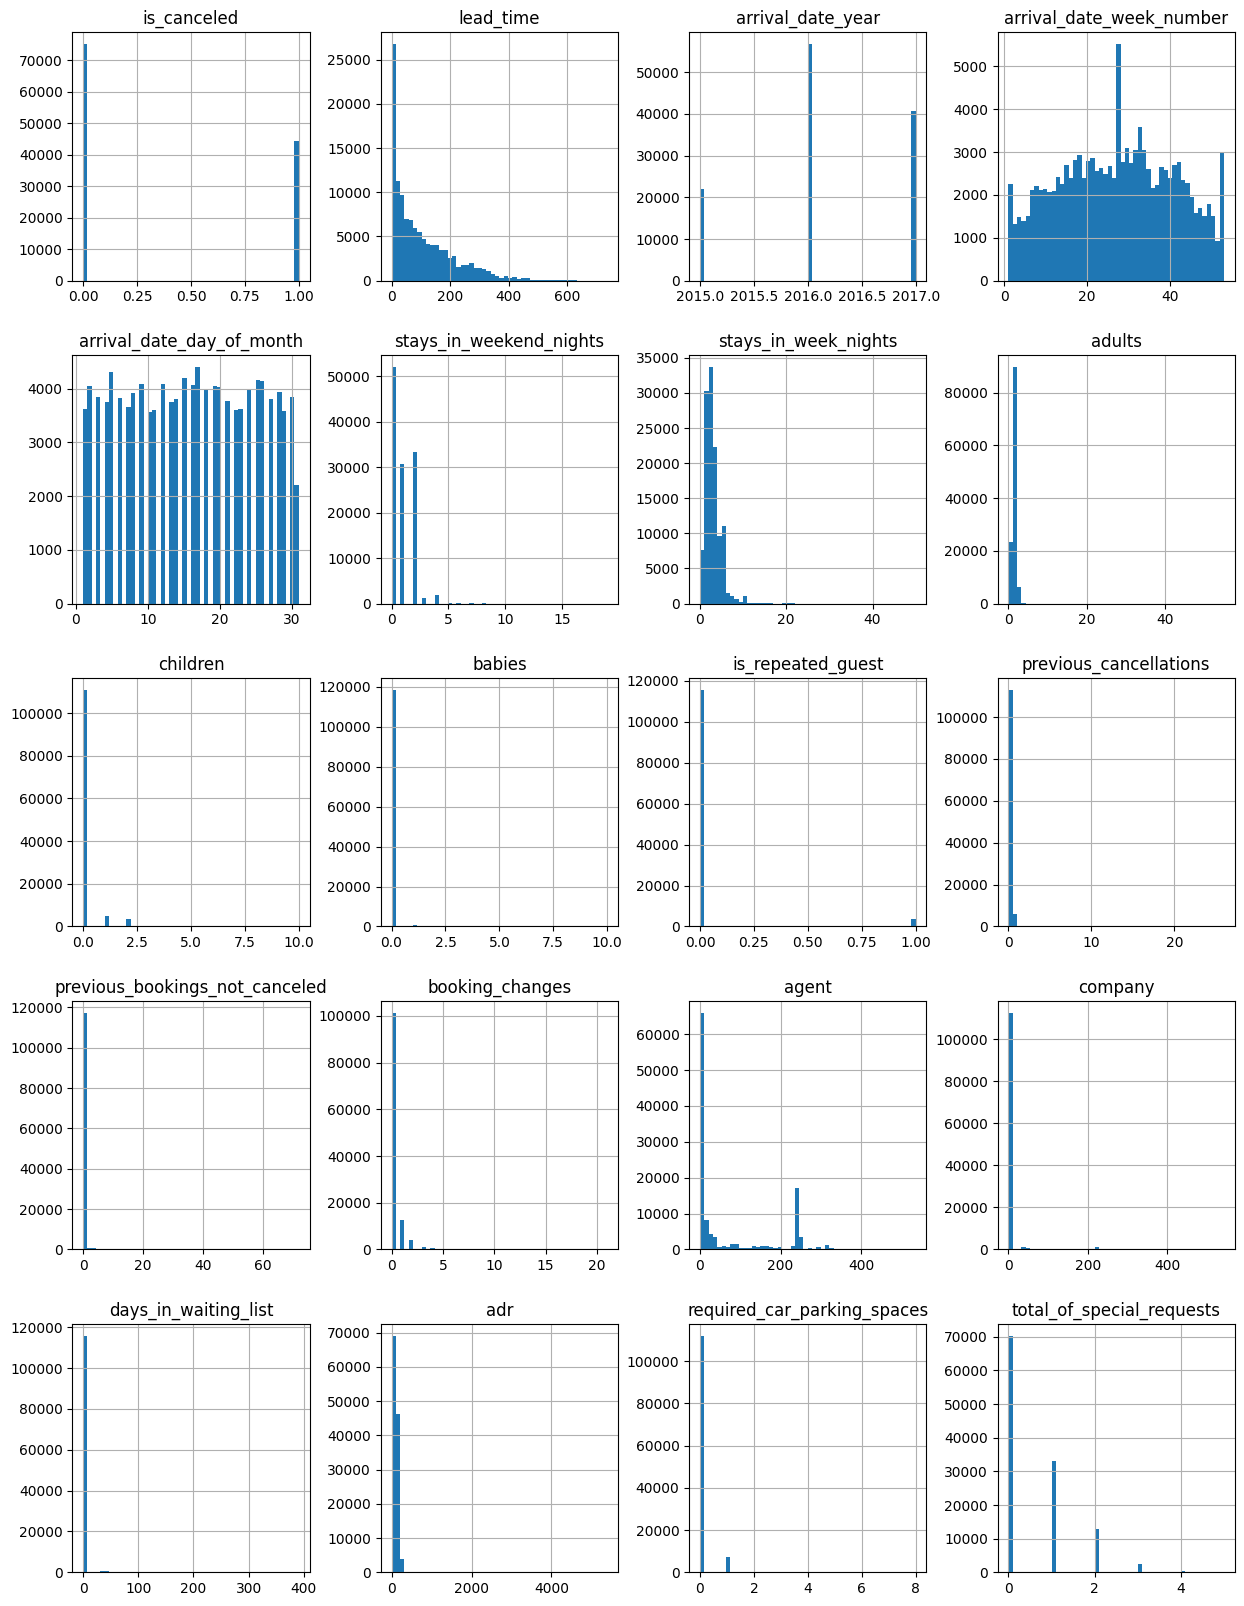

In [ ]:
# Visualization of numerical variables
df[num_cols].hist(bins=50, figsize=(15,20))
plt.show()

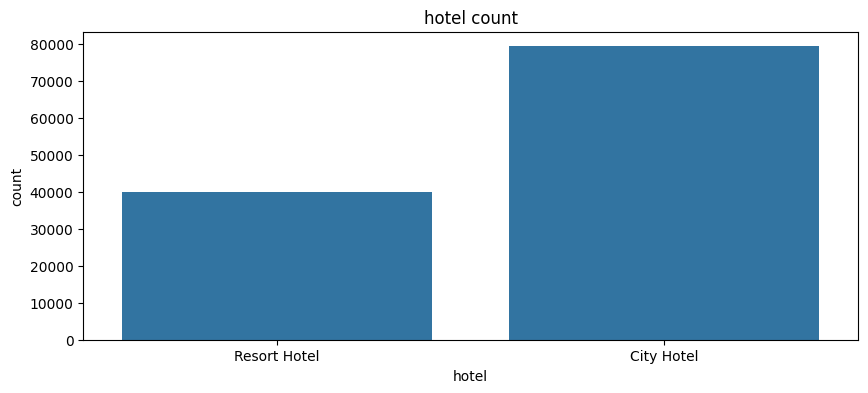

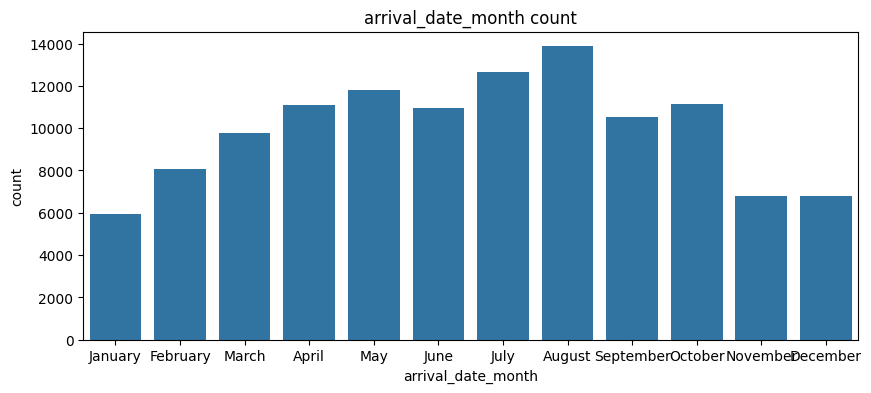

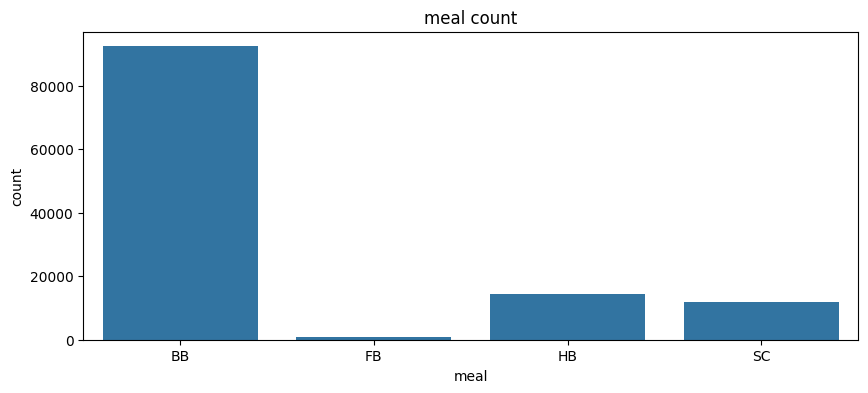

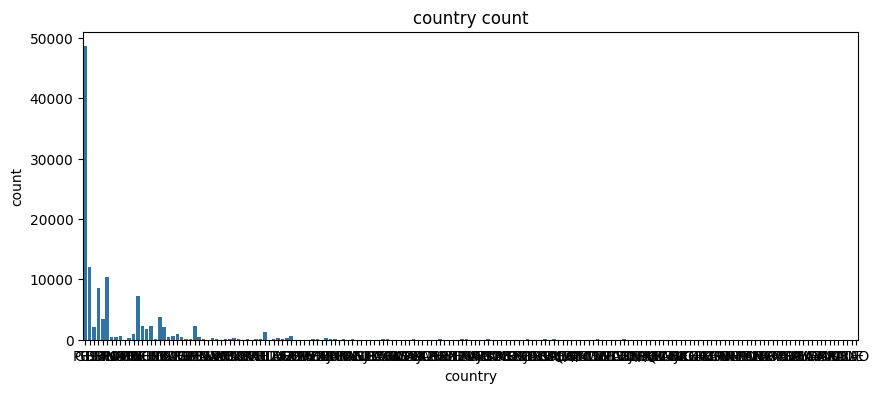

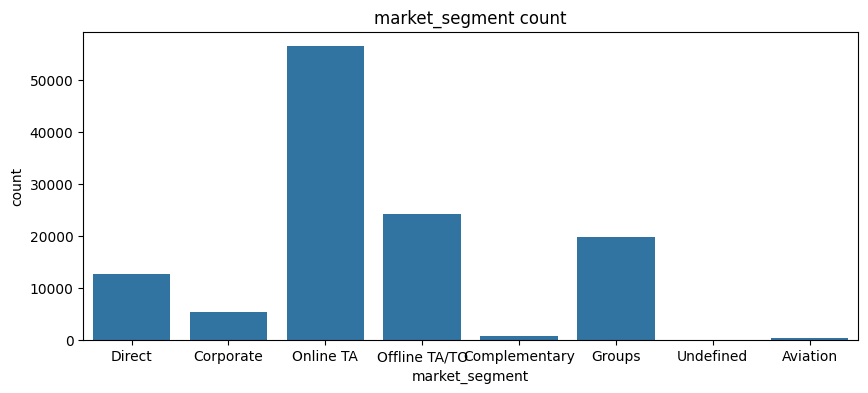

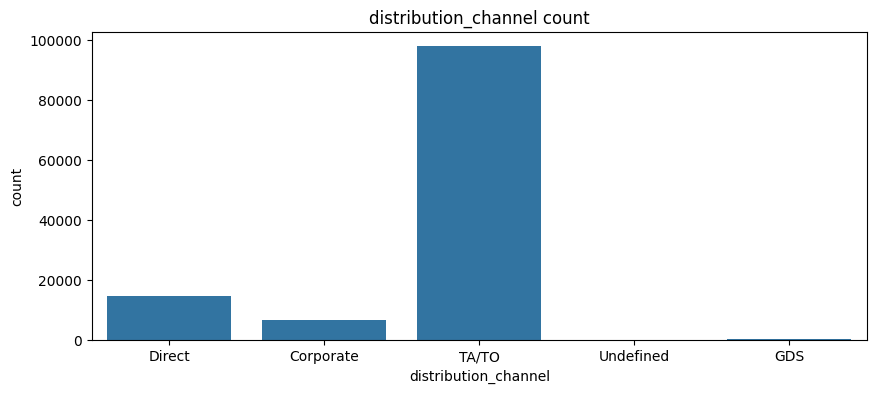

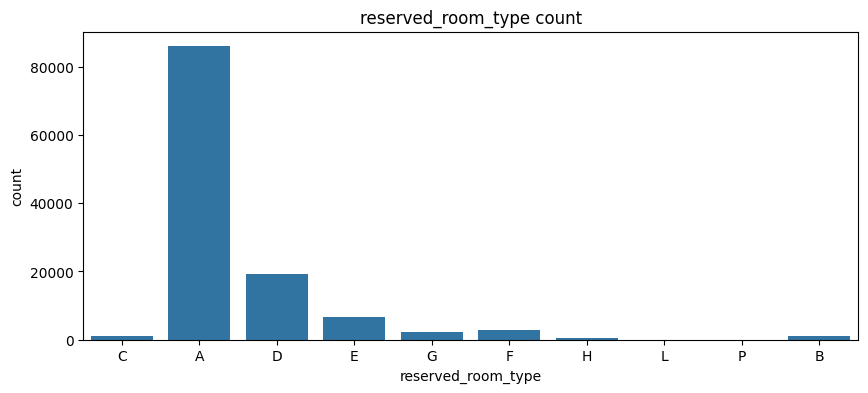

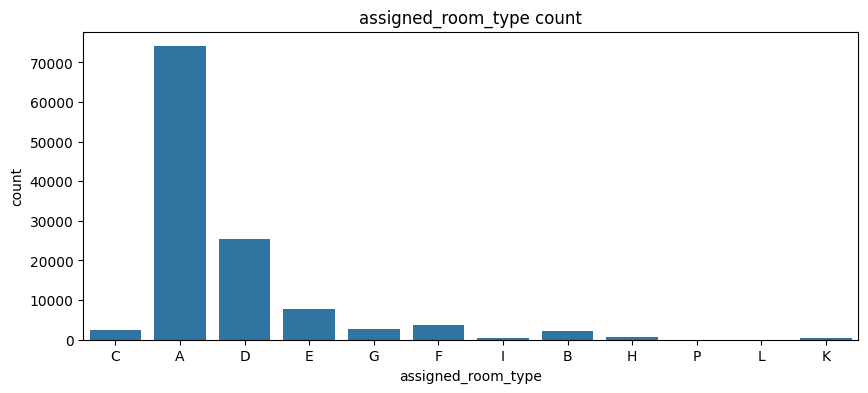

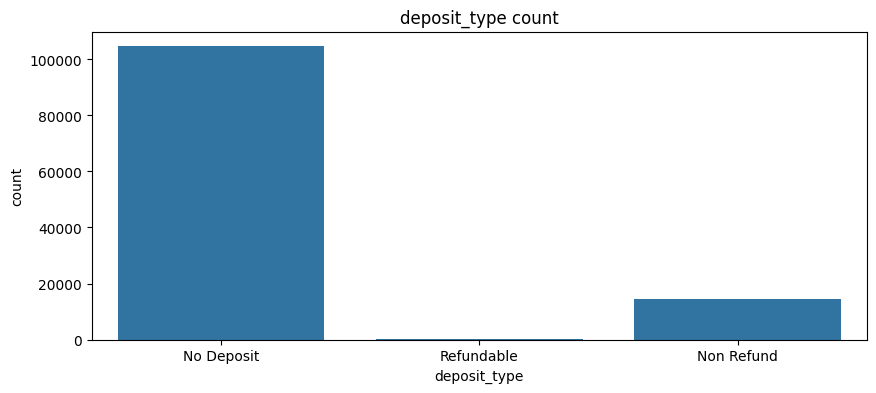

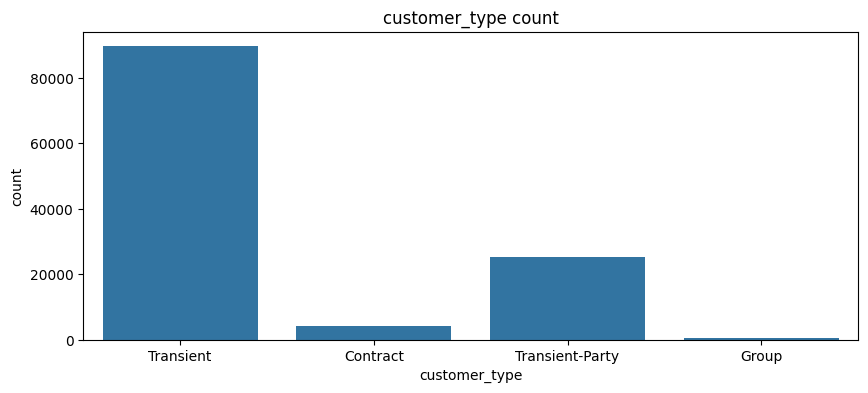

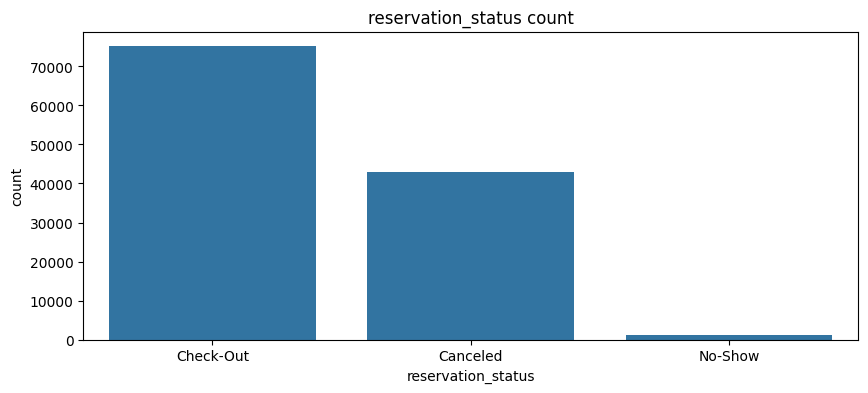

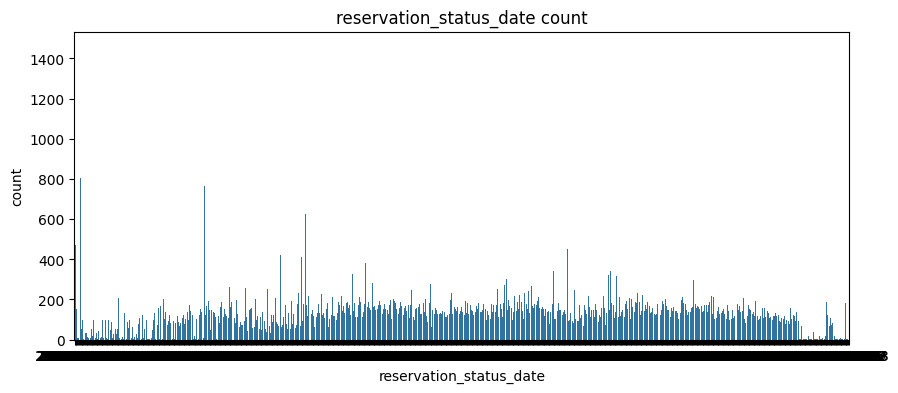

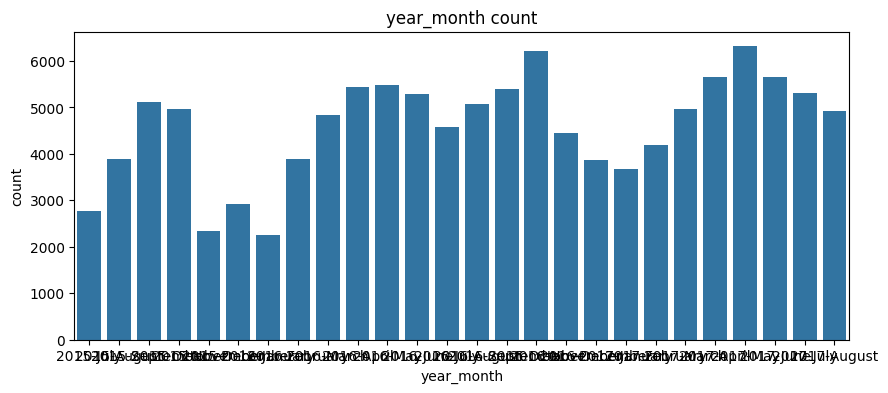

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))  # Set figure size
    sns.countplot(data=df, x=col)  # Create a bar plot for the categorical column

    plt.title(f'{col} count')  # Add title using the column name
    plt.xlabel(col)  # Label the x-axis
    plt.ylabel('count')  # Label the y-axis

    plt.show()  # Show the plot

# Correlation Analysis
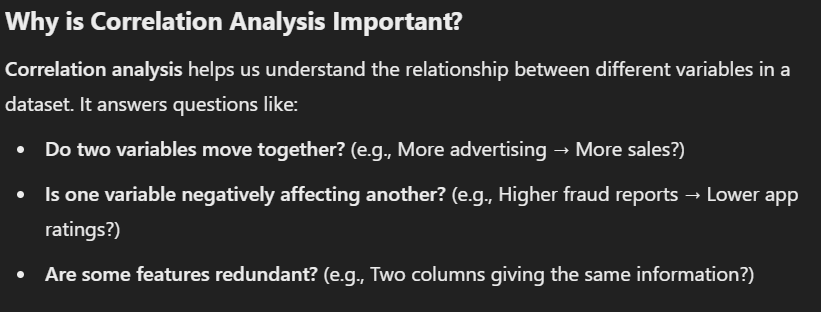

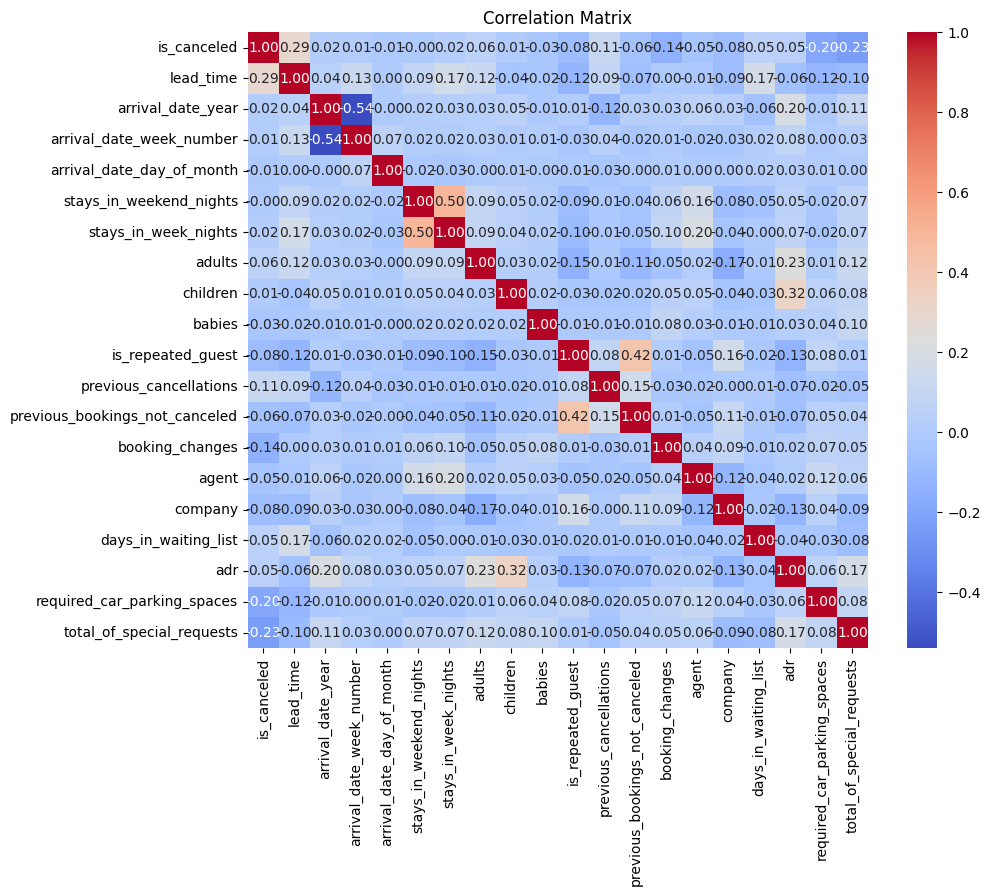

In [ ]:
# Correlation matrix for numerical data
correlation_matrix = df[num_cols].corr()  # Calculate correlation matrix for numerical columns

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Create heatmap with annotations
plt.title('Correlation Matrix')  # Add title
plt.show()  # Display the plot

# Key Observations:
1. The "is_canceled" column shows negative correlation with lead_time (-0.29) and total_special_requests (-0.20) → This means:

Longer lead time may increase cancellations.

More special requests may reduce cancellations.

2. previous_cancellations" has a positive correlation with "is_canceled" (~0.11) → If a guest has canceled before, they are slightly more likely to cancel again.

# Outlier Handling: IQR

In [ ]:
# Check for data outside of outlier bounds

for col in num_cols:
    q1 = df[col].quantile(0.25)  # Calculate the first quartile (25th percentile)
    q3 = df[col].quantile(0.75)  # Calculate the third quartile (75th percentile)
    iqr = q3 - q1  # Calculate the interquartile range (IQR)
    lower_bound = q1 - 1.5 * iqr  # Calculate the lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Calculate the upper bound for outliers
    mean = df[col].mean()  # Calculate the mean of the column
    max = df[col].max()  # Identify the maximum value in the column
    min = df[col].min()  # Identify the minimum value in the column
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]  # Identify outlier rows

    print(f'{col}\n upper bound : {upper_bound}, max : {max}  /  lower bound : {lower_bound}, min : {min}')
    # Print the upper bound vs max value and lower bound vs min value for each column

is_canceled
 upper bound : 2.5, max : 1  /  lower bound : -1.5, min : 0
lead_time
 upper bound : 373.0, max : 737  /  lower bound : -195.0, min : 0
arrival_date_year
 upper bound : 2018.5, max : 2017  /  lower bound : 2014.5, min : 2015
arrival_date_week_number
 upper bound : 71.0, max : 53  /  lower bound : -17.0, min : 1
arrival_date_day_of_month
 upper bound : 45.5, max : 31  /  lower bound : -14.5, min : 1
stays_in_weekend_nights
 upper bound : 5.0, max : 19  /  lower bound : -3.0, min : 0
stays_in_week_nights
 upper bound : 6.0, max : 50  /  lower bound : -2.0, min : 0
adults
 upper bound : 2.0, max : 55  /  lower bound : 2.0, min : 0
children
 upper bound : 0.0, max : 10  /  lower bound : 0.0, min : 0
babies
 upper bound : 0.0, max : 10  /  lower bound : 0.0, min : 0
is_repeated_guest
 upper bound : 0.0, max : 1  /  lower bound : 0.0, min : 0
previous_cancellations
 upper bound : 0.0, max : 26  /  lower bound : 0.0, min : 0
previous_bookings_not_canceled
 upper bound : 0.0, max :

The following columns do not need to be checked for outliers:

is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, is_repeated_guest, agent, company.

# Handling Conflicting Data/ Anomalies

In [ ]:
no_adults=df['adults']==0
no_children=df['children']==0
no_babies=df['babies']==0

no_people=no_adults & no_children & no_babies

df[no_people].shape

(180, 33)

removing rows where no people are booked

In [ ]:
df =df[~no_people]

In [ ]:
df.shape

(119210, 33)

## if agent == 0 means "no agent was used," but to see which segments and channels have more direct bookings (without an agent).

In [ ]:
agent0 =df[df['agent']==0]

agent0.groupby(['market_segment','distribution_channel'])['agent'].size()

market_segment  distribution_channel
Aviation        Corporate                202
                TA/TO                      8
Complementary   Corporate                 72
                Direct                   537
                TA/TO                     18
Corporate       Corporate               4095
                Direct                   166
                TA/TO                    321
Direct          Corporate                 76
                Direct                  5747
                GDS                        1
                TA/TO                    165
                Undefined                  1
Groups          Corporate               1042
                Direct                  1079
                TA/TO                   2023
Offline TA/TO   Corporate                  1
                Direct                     4
                TA/TO                    381
Online TA       Corporate                 31
                Direct                    67
                GDS                        1
                TA/TO                    240
Undefined       Undefined                  2
Name: agent, dtype: int64

if a booking comes from these segments/channels but has agent == 0, it might be a data issue, a fraud case, or an unusual scenario.

In [ ]:
# Create filters for non-direct market_segment and distribution_channel
market_non_direct = (df['market_segment'] == 'Groups') | (df['market_segment'] == 'Complementary') | (df['market_segment'] == 'Aviation')

distribution_non_direct = (df['distribution_channel'] == 'TA/TO') | (df['distribution_channel'] == 'GDS')


In [ ]:
agent0 =df['agent']==0

In [ ]:
df[market_non_direct & distribution_non_direct & agent0].shape

(2049, 33)

Dropping rows where market_segment & distribution_channel are not typically direct (requires agent) but acc to data no agent is involved

In [ ]:
df = df.drop(df[market_non_direct & distribution_non_direct & agent0].index)

# Check the shape of the DataFrame after removal
df.shape

(117161, 33)

# Check for rows where there are 10 children or babies and no adults

In [ ]:
df[df['children']>3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,0.0,0,Contract,133.16,0,1,No-Show,2015-12-07,2015-July


In [ ]:
df[df['babies'] > 3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,0.0,0,Transient,84.45,0,1,Check-Out,2016-01-14,2016-January
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,0.0,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14,2015-October


In [ ]:
df = df[df['children'] <= 3]

df = df[df['babies'] <= 3]

# Check the shape of the dataset after removing these rows
df.shape

(117158, 33)

In [ ]:
no_adult = df[no_adults]

no_adult.groupby(['children','babies','reservation_status']).size().unstack(['children','babies'])

<ipython-input-48-4d95d652b06e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_adult = df[no_adults]


children              1      2         3
babies                0      0    1    0
reservation_status                      
Canceled            NaN   78.0  NaN  3.0
Check-Out           4.0  125.0  2.0  8.0
No-Show             NaN    2.0  1.0  NaN

In [ ]:
# Use the ~ operator to invert the condition and keep rows where there are adults
df = df[~no_adults]
df.shape

<ipython-input-49-c5d9e1c5e475>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~no_adults]


(116935, 33)

# Check rows where the required car parking spaces are 8

In [ ]:
df[df['required_car_parking_spaces'] > 3] # exceeds 3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,0.0,0.0,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19,2017-March
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,0.0,0.0,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23,2017-March


In [ ]:
df = df[df['required_car_parking_spaces'] <= 3]

df.shape

(116933, 33)

# Filter rows where the guest has no previous visits but has a history of cancellations or non-cancellations

In [ ]:
book_cancel = df['previous_cancellations'] == 0  # No previous cancellations
book_not_cancel = df['previous_bookings_not_canceled'] == 0  # No previous non-cancellations
repeat_guest = df['is_repeated_guest'] == 0  # Guest has not visited before

# Filter rows where there are no cancellation/non-cancellation experiences but the guest has visited before
filtered_data = df[book_cancel & book_not_cancel & ~repeat_guest]

# Display the shape of the filtered dataset
filtered_data.shape

(542, 33)

In [ ]:
# Condition: Guests with cancellation or non-cancellation experience and no repeated visits
filtered_data = df[~book_cancel & ~book_not_cancel & repeat_guest]

# Display the shape of the filtered dataset
filtered_data.shape

(91, 33)

a booking cannot be canceled and not canceled at same time hence dropped

In [ ]:
# Condition 1: No cancellation/non-cancellation experience but marked as a repeated guest
df = df.drop(df[book_cancel & book_not_cancel & ~repeat_guest].index)

# Condition 2: Cancellation/non-cancellation experience but marked as visited before
df = df.drop(df[~book_cancel & ~book_not_cancel & repeat_guest].index) # repeated guest must have booking history

# Display the shape of the updated dataset
df.shape

<ipython-input-54-d8777a0830c5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[~book_cancel & ~book_not_cancel & repeat_guest].index) # repeated guest must have booking history


(116300, 33)

In [ ]:
cancel = df['is_canceled'] == 1  # reservation has been canceled
not_cancel = df['is_canceled'] == 0  # reservation has not been canceled

In [ ]:
check_in = df['reservation_status'] == 'Check-Out'  # Reservation has been checked out
canceled = df['reservation_status'] == 'Canceled'  # Reservation is marked as canceled

In [ ]:
df[cancel & check_in]  # Filters data where the reservation is both canceled and checked-out

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month


In [ ]:
df[not_cancel & canceled]  # Filters data where the reservation is not canceled but the status is 'Canceled'

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month


wuhu no conflicting data present

# Days in Waiting List vs Reservation Status

In [ ]:
df.groupby(['days_in_waiting_list', 'reservation_status']).size().unstack('reservation_status').T

days_in_waiting_list,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70,71,72,74,75,76,77,79,80,81,83,84,85,87,89,91,93,96,97,98,99,100,101,105,107,108,109,111,113,116,117,120,121,122,125,142,147,150,154,160,162,165,167,174,175,176,178,183,185,187,193,207,215,223,224,236,259,330,379,391
reservation_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canceled,39167.0,3.0,1.0,59.0,7.0,5.0,NaN,2.0,3.0,12.0,26.0,4.0,1.0,1.0,3.0,28.0,4.0,37.0,2.0,30.0,26.0,36.0,53.0,2.0,19.0,17.0,4.0,3.0,49.0,2.0,106.0,19.0,1.0,12.0,94.0,NaN,NaN,29.0,226.0,19.0,63.0,30.0,1.0,111.0,65.0,93.0,1.0,19.0,1.0,48.0,NaN,1.0,1.0,10.0,23.0,25.0,NaN,5.0,25.0,1.0,60.0,32.0,NaN,NaN,29.0,73.0,18.0,7.0,NaN,NaN,20.0,1.0,26.0,20.0,16.0,NaN,NaN,1.0,15.0,4.0,NaN,50.0,38.0,21.0,NaN,29.0,3.0,1.0,48.0,NaN,3.0,12.0,NaN,59.0,1.0,NaN,1.0,25.0,1.0,2.0,1.0,NaN,9.0,NaN,NaN,25.0,17.0,1.0,NaN,15.0,1.0,11.0,5.0,1.0,NaN,23.0,1.0,5.0,13.0,25.0,6.0,6.0,NaN,1.0,9.0,45.0
Check-Out,72326.0,9.0,4.0,NaN,17.0,3.0,15.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,5.0,25.0,NaN,10.0,1.0,NaN,1.0,1.0,3.0,1.0,NaN,4.0,NaN,23.0,NaN,NaN,1.0,NaN,29.0,14.0,2.0,1.0,1.0,47.0,NaN,9.0,NaN,NaN,18.0,29.0,NaN,1.0,23.0,33.0,17.0,31.0,1.0,5.0,NaN,NaN,22.0,NaN,164.0,9.0,4.0,17.0,NaN,51.0,3.0,35.0,12.0,16.0,NaN,NaN,1.0,1.0,20.0,NaN,37.0,NaN,7.0,1.0,1.0,1.0,NaN,76.0,1.0,NaN,1.0,25.0,3.0,30.0,13.0,NaN,17.0,2.0,2.0,8.0,1.0,12.0,5.0,1.0,NaN,NaN,1.0,50.0,15.0,1.0,21.0,11.0,2.0,NaN,13.0,NaN,1.0,4.0,NaN,39.0,25.0,NaN,2.0,22.0,NaN,10.0,8.0,36.0,4.0,29.0,10.0,14.0,6.0,NaN
No-Show,1183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


delete data that is over 1 yr old

In [ ]:
df = df[df['days_in_waiting_list'] <= 365]

lead time <-> reservation_status

In [ ]:
df.groupby(['lead_time', 'reservation_status']).size().unstack(['reservation_status']).T

lead_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,393,394,395,396,397,398,399,400,403,405,406,407,408,409,410,412,414,418,419,420,422,423,424,426,429,433,434,435,437,440,443,444,445,447,448,450,451,454,457,458,460,461,462,463,464,465,467,468,471,475,476,478,479,482,489,490,493,496,503,504,507,510,517,518,521,524,531,532,538,542,545,552,559,566,573,580,587,594,601,605,608,615,622,626,629,709,737
reservation_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canceled,285.0,244.0,160.0,156.0,143.0,183.0,184.0,159.0,195.0,206.0,203.0,205.0,262.0,154.0,200.0,242.0,221.0,220.0,246.0,253.0,206.0,186.0,205.0,201.0,169.0,194.0,230.0,236.0,226.0,199.0,228.0,175.0,202.0,222.0,318.0,181.0,192.0,312.0,273.0,222.0,220.0,171.0,131.0,152.0,243.0,196.0,154.0,143.0,127.0,181.0,183.0,122.0,188.0,154.0,196.0,158.0,331.0,127.0,152.0,213.0,159.0,220.0,123.0,122.0,134.0,175.0,145.0,178.0,256.0,226.0,118.0,197.0,186.0,146.0,235.0,174.0,122.0,132.0,163.0,131.0,141.0,133.0,157.0,103.0,80.0,139.0,189.0,251.0,190.0,119.0,78.0,135.0,243.0,162.0,125.0,125.0,131.0,154.0,151.0,213.0,156.0,122.0,199.0,195.0,155.0,235.0,150.0,78.0,93.0,132.0,110.0,148.0,158.0,230.0,97.0,161.0,97.0,115.0,82.0,74.0,106.0,112.0,80.0,106.0,126.0,107.0,104.0,93.0,121.0,122.0,141.0,134.0,59.0,78.0,148.0,146.0,80.0,126.0,71.0,109.0,104.0,80.0,123.0,155.0,98.0,91.0,103.0,101.0,165.0,94.0,164.0,141.0,98.0,106.0,48.0,130.0,158.0,111.0,167.0,83.0,74.0,138.0,134.0,102.0,103.0,71.0,148.0,74.0,149.0,149.0,65.0,60.0,105.0,77.0,124.0,153.0,62.0,118.0,213.0,113.0,111.0,151.0,74.0,146.0,100.0,76.0,137.0,60.0,158.0,69.0,46.0,44.0,74.0,88.0,36.0,91.0,45.0,69.0,140.0,110.0,70.0,45.0,41.0,59.0,63.0,84.0,62.0,84.0,67.0,41.0,112.0,149.0,102.0,142.0,63.0,43.0,42.0,38.0,55.0,129.0,41.0,78.0,67.0,61.0,53.0,37.0,78.0,39.0,30.0,36.0,46.0,40.0,32.0,93.0,28.0,39.0,46.0,47.0,87.0,81.0,73.0,44.0,27.0,33.0,101.0,158.0,41.0,111.0,29.0,25.0,54.0,61.0,23.0,48.0,36.0,24.0,26.0,30.0,102.0,129.0,70.0,55.0,87.0,51.0,30.0,116.0,44.0,106.0,45.0,45.0,61.0,25.0,84.0,86.0,92.0,134.0,95.0,45.0,111.0,149.0,56.0,103.0,35.0,85.0,21.0,35.0,120.0,24.0,70.0,50.0,82.0,26.0,77.0,32.0,49.0,89.0,19.0,59.0,24.0,37.0,69.0,

In [ ]:
# Delete data where lead time is more than 1 year
df = df[df['lead_time'] <= 365]

In [ ]:
df.shape

(113200, 33)

# ratio of weekday stays to weekend stays:
ratio should no exceed 5:2

In [ ]:
# change stays with no nights (0) to 1
sorted((df['stays_in_week_nights'].replace(0,1)/df['stays_in_weekend_nights'].replace(0,1)).unique())

[np.float64(0.5),
 np.float64(1.0),
 np.float64(1.25),
 np.float64(1.5),
 np.float64(1.6666666666666667),
 np.float64(1.75),
 np.float64(1.8333333333333333),
 np.float64(2.0),
 np.float64(2.142857142857143),
 np.float64(2.1666666666666665),
 np.float64(2.2),
 np.float64(2.2222222222222223),
 np.float64(2.25),
 np.float64(2.2857142857142856),
 np.float64(2.3333333333333335),
 np.float64(2.375),
 np.float64(2.4),
 np.float64(2.4285714285714284),
 np.float64(2.4615384615384617),
 np.float64(2.5),
 np.float64(2.5384615384615383),
 np.float64(2.5714285714285716),
 np.float64(2.6),
 np.float64(2.625),
 np.float64(2.6315789473684212),
 np.float64(2.6666666666666665),
 np.float64(2.7142857142857144),
 np.float64(2.75),
 np.float64(2.7777777777777777),
 np.float64(2.8),
 np.float64(2.8333333333333335),
 np.float64(2.857142857142857),
 np.float64(3.0),
 np.float64(3.1666666666666665),
 np.float64(3.25),
 np.float64(3.3333333333333335),
 np.float64(3.5),
 np.float64(3.75),
 np.float64(4.0),
 np.f

no data with unusual ratios

# Check for cases where the reservation has been changed more than 10 times

In [ ]:
df[df['booking_changes'] > 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,I,17,No Deposit,240.0,0.0,0,Transient,0.00,0,1,Check-Out,2015-10-23,2015-September
9106,Resort Hotel,1,206,2016,October,44,27,2,5,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,16,No Deposit,240.0,0.0,0,Transient,46.88,0,1,Canceled,2016-07-25,2016-October
23784,Resort Hotel,0,101,2016,April,18,29,2,3,2,0,0,HB,BEL,Groups,TA/TO,0,0,0,A,A,13,No Deposit,95.0,0.0,0,Transient-Party,75.00,0,1,Check-Out,2016-04-05,2016-April
23849,Resort Hotel,0,101,2016,April,18,29,2,5,2,0,0,HB,NLD,Groups,TA/TO,0,0,0,A,A,12,No Deposit,95.0,0.0,0,Transient-Party,75.00,0,0,Check-Out,2016-06-05,2016-April
38759,Resort Hotel,0,149,2017,July,30,25,8,21,2,0,0,SC,FRA,Online TA,TA/TO,0,0,0,E,I,13,No Deposit,240.0,0.0,0,Transient,0.00,0,0,Check-Out,2017-08-23,2017-July
51773,City Hotel,0,158,2016,May,22,25,0,4,2,1,0,BB,AUT,Online TA,TA/TO,0,0,0,A,D,13,No Deposit,9.0,0.0,0,Transient,114.75,0,1,Check-Out,2016-05-29,2016-May
51776,City Hotel,0,158,2016,May,22,25,0,4,2,0,0,BB,AUT,Online TA,TA/TO,0,0,0,D,D,13,No Deposit,9.0,0.0,0,Transient,123.25,0,1,Check-Out,2016-05-29,2016-May
51853,City Hotel,0,159,2016,May,22,26,0,3,1,0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,E,13,No Deposit,9.0,0.0,0,Transient,119.85,0,1,Check-Out,2016-05-29,2016-May
51919,City Hotel,1,159,2016,May,22,26,0,3,1,0,0,BB,AUT,Online TA,TA/TO,0,0,0,F,F,14,No Deposit,9.0,0.0,0,Transient-Party,187.85,0,0,Canceled,2016-05-16,2016-May
51952,City Hotel,0,159,2016,May,22,26,0,3,2,1,0,BB,AUT,Online TA,TA/TO,0,0,0,A,D,15,No Deposit,9.0,0.0,0,Transient,119.85,0,1,Check-Out,2016-05-29,2016-May


In [ ]:
# Remove entries where the booking changes exceed 10 but no stay has occurred
df = df[df['booking_changes'] <= 10]  # Filters out data where 'booking_changes' is greater than 10

df.shape

(113182, 33)

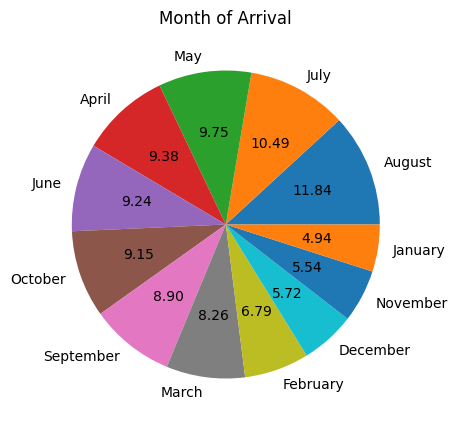

In [ ]:
# visualization
plt.figure(figsize=(5,5))

plt.pie(
    df['arrival_date_month'].value_counts(),
    labels=df['arrival_date_month'].value_counts().index,
    autopct='%0.2f',
    startangle=0,
)
plt.title('Month of Arrival')
plt.show()

# VIZ

1. Revenue trends over time: Identify peak seasons based on revenue.

<ipython-input-68-aefad02d63da>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_trend = df.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()


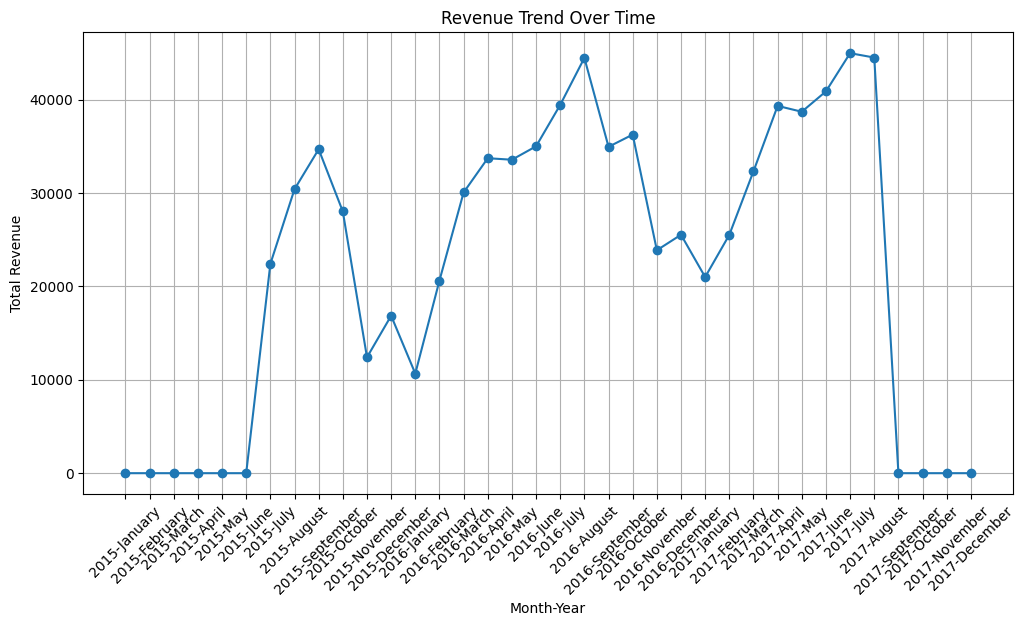

In [ ]:
# Create a revenue column (assuming per-night charge is proportional to guests)
df['revenue'] = (df['stays_in_week_nights'] + df['stays_in_weekend_nights']) * (df['adults'] + df['children'] + df['babies'])

# Group by year and month
revenue_trend = df.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()

# Sort the data
revenue_trend['month_year'] = revenue_trend['arrival_date_year'].astype(str) + '-' + revenue_trend['arrival_date_month'].astype(str)
revenue_trend = revenue_trend.sort_values(by=['arrival_date_year', 'arrival_date_month'])

# Plot the revenue trend
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend['month_year'], revenue_trend['revenue'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.title("Revenue Trend Over Time")
plt.grid(True)
plt.show()


2. Cancellation Rate as a Percentage of Total Bookings: Understand cancellation trends over time

<ipython-input-69-39d323abed85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_data = df.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()


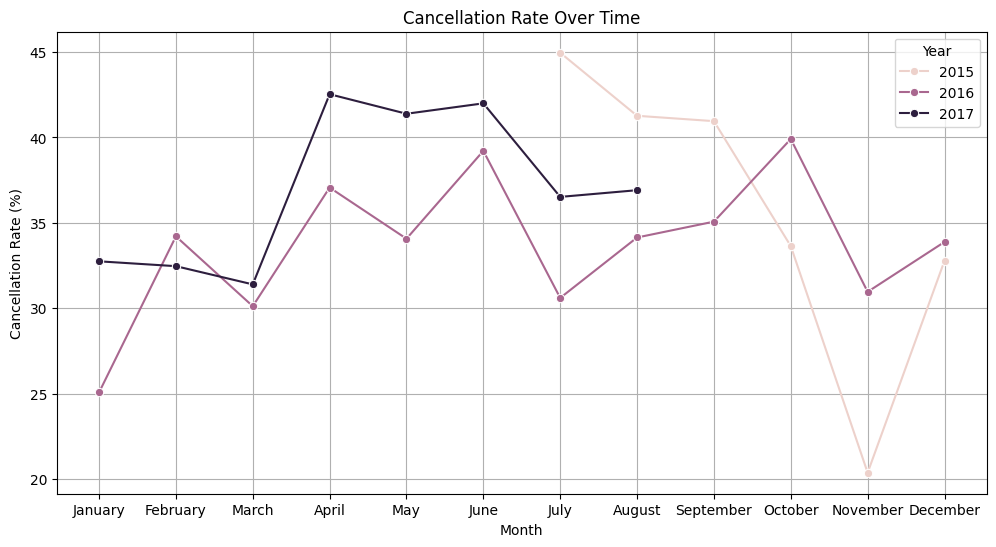

In [ ]:
# Group data by year and month
cancellation_data = df.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Convert to percentage
cancellation_data['cancellation_rate'] = cancellation_data['is_canceled'] * 100

# Plot cancellation rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=cancellation_data['arrival_date_month'], y=cancellation_data['cancellation_rate'], hue=cancellation_data['arrival_date_year'], marker="o")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate Over Time")
plt.legend(title="Year")
plt.grid(True)
plt.show()

3. Geographical Distribution of Users (Country-wise Bookings): See where bookings come from.

In [ ]:
import plotly.express as px

# Count bookings per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'booking_count']

# Plot a choropleth map
fig = px.choropleth(country_counts,
                     locations="country",
                     locationmode="ISO-3",
                     color="booking_count",
                     hover_name="country",
                     title="Geographical Distribution of Bookings",
                     color_continuous_scale="viridis")
fig.show()

4. Booking Lead Time Distribution: Find out if most bookings are last-minute or planned ahead.

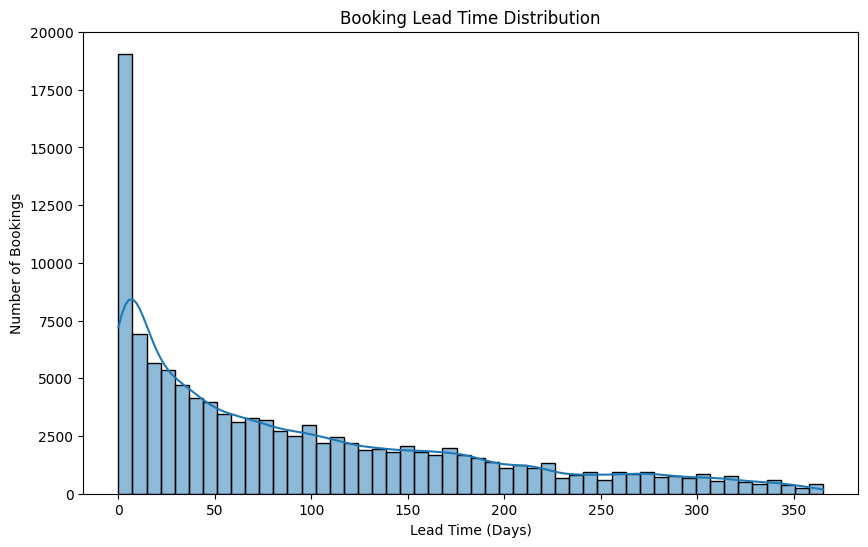

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.title("Booking Lead Time Distribution")
plt.show()

In [ ]:
!pip install faiss-cpu sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 889.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
df.to_csv("cleaned_booking_data.csv", index=False)  # Saves without the index column

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss

model = SentenceTransformer('all-MiniLM-L6-v2')
text_data = df['text_data'].tolist()
embeddings = model.encode(text_data, convert_to_numpy=True)
np.save("embeddings.np", embeddings)
embedding_dim = embeddings.shape[1]  # Dimension of embeddings
index = faiss.IndexFlatL2(embedding_dim)
index.add(embeddings)
faiss.write_index(index, "faiss_index.bin")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyError: 'text_data'

In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd


embeddings = np.load("embeddings.npy")
index = faiss.read_index("faiss_index.bin")
df = pd.read_csv("cleaned_booking_data.csv")


model = SentenceTransformer('all-MiniLM-L6-v2')

def retrieve_similar_bookings(query, top_k=5):
    """Retrieve the most relevant bookings based on the query."""
    query_embedding = model.encode([query], convert_to_numpy=True)
    _, indices = index.search(query_embedding, top_k)

    results = [df.iloc[idx]['text_data'] for idx in indices[0]]
    return results


query = "Highest revenue bookings from Portugal"
print(retrieve_similar_bookings(query))